# Subject: 
Abstract—Finding connected components in a graph is a well- known problem in a wide variety of application areas such as social network analysis, data mining, image processing, and etc. In this paper, we present an efficient and scalable approach in MapReduce to find all the connected components in a given graph.  We  compare  our approach  with  the state-of-the-art on a real-world graph. We also demonstrate the viability of our approach on a massive graph with ∼6B nodes and ∼92B edges on an 80-node hadoop cluster. To the best of our knowledge, this is the largest graph publicly used in such an experiment.
# I. Introduction
Many systems such as proteins, chemical compounds, and the Internet can be modeled as a graph to understand local and global characteristics of the system. In many cases, the system under investigation is very large and the corresponding graph has large number of nodes/edges requiring advanced processing approaches to efficiently derive information from the graph. Several graph mining techniques have been de- veloped to extract information from the graph representation and analyze various features of the complex networks [1]. Finding connected components, disjoint subgraphs in which any two vertices are connected to each other by paths, is a very common way of extracting information from the graph in a wide variety of application areas ranging from analysis of coherent cliques in social networks, density based clustering, image segmentation, data base queries and many more [2].
Record linkage, the task of identifying which records in a database refer to the same entity, is also one of the major ap- plication areas of connected components. This paper describes the connected component computation strategy used in the record linkage process of a major commercial People Search Engine to deploy a massive database of personal information. The process starts by collecting billions of personal records from three sources of U.S. personal records. The first source is derived from US government records, such as marriage, divorce and death records. The second is derived from publicly available web profiles, such as professional and social network public profiles. The third type is derived from commercial sources, such as financial and property reports (e.g., informa- tion made public after buying a house). Example fields on these records might include name, address, birthday, phone
 

number, (encrypted) social security number, job title, and university attended. Note that different records will include different subsets of these example fields. After collection and categorization, the Record Linkage process should link together all records belonging to the same real-world person. That is, this process should turn billions of input records into a few hundred million clusters of records (or profiles), where each cluster is uniquely associated with a single real-world
U.S. resident. Our system follows the standard high-level structure of a record linkage pipeline [3] by being divided into four major components: 1) data cleaning 2) blocking 3) pair- wise linkage and 4) clustering. First, all records go through a cleaning process that starts with the removal of bogus, junk and spam records. Then all records are normalized to an approximately common representation. Finally, all major noise types and inconsistencies are addressed, such as empty/bogus fields, field duplication, outlier values and encoding issues. At this point, all records are ready for subsequent stages of Record Linkage. The blocking step, presented in [4], groups records by shared properties to determine which pairs of records should be examined by the pairwise linker as potential duplicates. Next, the linkage step assigns a score to pairs of records inside each block using a high precision machine learning model whose implementation is described in detail in [5]. If a pair scores above a user-defined threshold, the records are presumed to represent the same person. The clustering step first combines record pairs into connected components, which is the focus of this paper, and then further partitions each connected component to remove inconsistent pair-wise links. Hence at the end of the entire record linkage process, the system has partitioned the billions of input records into disjoint sets called profiles, where each profile corresponds to a single person.
The processing of such enormous data volumes requires highly scalable parallelized algorithms. This is only possible with distributed computing, and the need to distribute the work informs the design. In this paper, we propose an algorithm for finding connected components which is based on the MapReduce programming model and is implemented using Hadoop.
In the remainder of the paper, we first present the related work in Section II. Next, we describe our approach in Sec- tion III. Then, we evaluate the performance of our algorithm
 
 
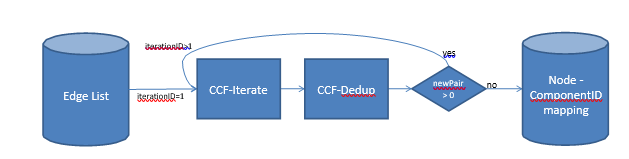
Figure 1. Connected Component Finder(CCF) Module

 
compared to other approaches using several real-world datasets in Section IV. Finally, we conclude with Section V.


###  .II.	RELATED WORK
Finding connected components within a graph is well- known problem and has a long research history. However, scale of the data has tremendously grown in recent years. Many online networks such as Facebook, LinkedIn, and Twit- ter, have 100s of millions of users and many more connections among these users. Similarly, several online people search en- gines collect billions of records about people, and try to cluster these records after computing the similarity scores between these records. Analysis of such massive graphs requires novel types of algorithms.
Recently, several MapReduce approaches have been devel- oped to find the connected components in a graph [2], [6]–[9]. In spite of the fact that the basic idea behind these approaches has similarities such as representing each connected compo- nent with the smallest node id, there are some differences in the way how they implement their ideas. PEGASUS [7] is a graph mining system where several graph algorithms including connected component computation are represented and implemented as repeated matrix-vector multiplications. [6] and [7] have O(d) bound on the MapReduce iterations needed where d is the diameter of the largest connected component.
[2] and [9] focus on reducing the boundaries of the number of map-reduce iterations needed and provide algorithms with lower bounds (3logd in [9]). On the other hand, in [7], Kang et. al. analyze several real networks and show that real networks have small diameters in general. So, these improvements might not help much in real networks where the diameters are small. In this paper, we present our MapReduce based approach for finding connected components that we have been using regularly for 2 years on massive graphs. The number of nodes ranges from 3B to 7B, while the number of edges ranges from 15B to 100B for a typical graph that we have in production.
The size of largest connected component that we observe in these graphs ranges from 5M to 200M.


# III. Algorithmes : 
This is the pseudo code of the algorithmes that we want to impelemnt in python. the Methedologie and the expelanation of the algorithmes will be in the next part.
### CCF Algorithme
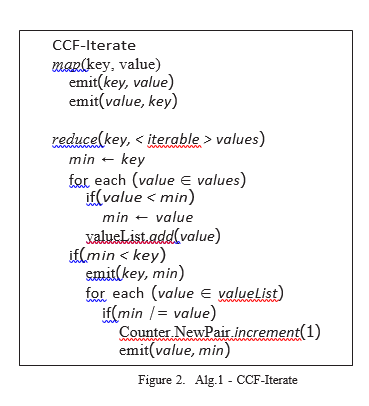
### CCF Algorithme with sorting
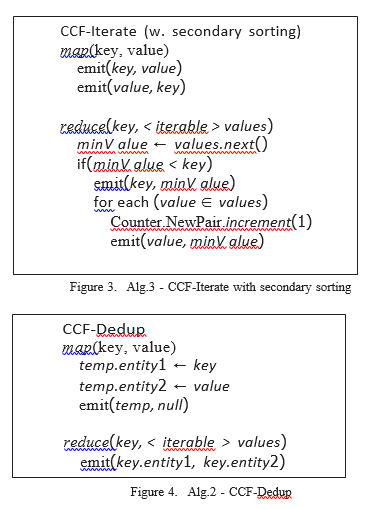


### IV.	METHODOLOGY
In this section we present our algorithm for finding con- nected components in a given graph using the MapReduce framework. We make heavy use of the Hadoop implementation of the MapReduce computing framework, and the algorithm described here is implemented as a series of Hadoop jobs written in Java. It is beyond the scope of this paper to fully describe this framework (see [10] for an overview), but we do discuss the ways its constraints inform our design. MapReduce divides computing tasks into a map phase in which the input which is given as (key,value) pairs is split up among multiple machines to be worked on in parallel and a reduce phase in which the output of the map phase is put back together for each key to independently process the values for each key in parallel. Moreover, in a MapReduce context, recursion becomes iteration.
Before describing the algorithm, let’s give a formal defi- nition of connected components in graph theory context. Let G = (V, E) be an undirected graph where V is the set of vertices and E is the set of edges. C = (C1, C2, ..., Cn) is the set of disjoint connected components in this graph where
(C1 ∪ C2 ∪ ... ∪ Cn) = V and (C1 ∩ C2 ∩ ... ∩ Cn) = ∅. For each connected component Ci ∈ C, there exists a path in G between any two vertices vk and vl where (vk, vl) ∈ Ci. Additionally, for any distinct connected component (Ci, Cj) ∈ C, there is no path between any pair vk and vl where vk ∈ Ci, vl ∈ Cj. Thus, problem of finding all connected components in a graph
is finding the C satisfying the above conditions.
In order to find the connected components in a graph, we developed the Connected Component Finder (CCF) module shown in Figure 1. The input to the module is the list of all the edges in the graph. As an output from the module, what we want to obtain is the mapping from each node in the graph to its corresponding componentID. For simplicity, we use the smallest node id in each connected component as the identifier of that component. Thus, the module should output a mapping table from each node in the graph to the smallest node id in its corresponding connected component. To this end, we designed a chain of two MapReduce jobs, namely, CCF-Iterate, and CCF-Dedup, that will run iteratively till we find the corresponding componentIDs for all the nodes in the graph.
CCF-Iterate  job  generates  adjacency  lists  AL    = (a1, a2, ..., an) for each node v, and if the node id of this node vid is larger than the min node id amin in the adjacancy list, it first creates a pair (vid, amin) and then a pair for each (ai, amin) where ai ∈ AL, and ai /= amin. If there is only one node in AL, it means we will generate the pair that we have in previous iteration. However, if there is more than one node in AL, it means we might generate a
pair that we didn’t have in the previous iteration, and one more iteration is needed. Please note that, if vid is smaller than amin, we do not emit any pair.
The pseudo code of CCF-Iterate is given in Figure 2. For the first iteration, this job takes the initial edge list as input.
In later iterations, the input is the output of CCF-Dedup from the previous iteration. We will represent the key and value pairs in the MapReduce framework as < key; value >. We first start with the initial edge list to construct the first degree neighborhood of each node. To this end, for each edge < a; b >, mapper emits both < a; b >, and < b; a > pairs so that a should be in the adjacency list of b and vice versa. In reduce phase, all the adjacent nodes will be grouped together for each node. We first go over all the values to find the minValue and store all the values in a list. If the minValue is larger than key, we do not emit anything. Otherwise, we first emit the < key; minV alue > pair. Next, we emit a pair for all other values as < value; minV alue >, and increase the global NewPair counter by 1. If the counter is 0 at the end of the job, it means that we found all the components and there is no need for further iterations.
Adjusting memory utilization is a crucial step while devel- oping tools/services to run in the cloud as the high memory machines are much more expensive [11]. In MapReduce, values can be iterated just once without loading all of them into memory. If multiple passes are needed, the values should be stored in a list. Reducers don’t receive the values in a sorted order. Hence, the CCF-Iterate Algorithm in Figure 2 iterates over the values twice. First iteration is for finding the minValue, the second is for emitting the necessary pairs. The space complexity of this approach is O(N) where N is the size of largest connected component as we store the values in a list in the reducer. In order to improve the space complexity further, we implemented another version of CCF- Iterate, presented in Figure 3. A secondary sort approach can be used to pass the values to the reducer in a sorted way with
 

close to each other when the size of the largest component is relatively small(i.e. up to 50K nodes). However, when there are connected components with millions of nodes, the second approach is much more efficient.
During the CCF-Iterate job, the same pair might be emitted multiple times. The second job, CCF-Dedup, just deduplicates the output of the CCF-Iterate job. This job increases the efficiency of CCF-Iterate job in terms of both speed and I/O overhead. The pseudo code for this job is given in Figure 4.
We illustrate our approach on an example set of edges in Figure 5. In this example, there are 6 edges in the graph, and we iteratively find the connected components. Figure 5- (a),(b),(c), and (d) represent the CCF-Iterate jobs. Since CCF- Dedup job just deduplicates the CCF-Iterate output, it is not illustrated in the figure. For example, in the output of second iteration in Figure 5-(b), there are duplicates of < B; A >, < C; A >, < D; A >, and < E; A >. However, the duplicates are removed by the CCF-Dedup job and are not illustrated in the input of third iteration in Figure 5. The min value for each reduce group is represented with a blue circle. The number of newPairs found in each iteration are 4, 9, 6, and 0, respectively. Thus, we stop after the fourth iteration as all the connected components are found.
Worst case scenario for the number of necessary iterations is d+1 where d is the diameter of the network. The worst
 
custom partitioning (see [10] for details). We don’t need to iterate over the values with this approach as the first value will be the minValue. We will just iterate over the values once to emit the necessary values. During our experiments, the run-time performance of these two approaches were very
 
case happens when the min node in the largest connected component is an end-point of the largest shortest-path. The best case scenario takes d/2+1 iterations. For the best case, the min node should be at the center of the largest shortest- path.



# V. Implementation : 
##  V.1. implentation  in Pyspark : 
### V.1.1. CCF Iterate 

In [ ]:
import time
from pyspark import *
# Spark Configurations
conf = SparkConf()
conf.set("spark.master", "local[*]")
conf = conf.setAppName('WordCount')
sc = SparkContext(conf=conf)


def traitement(key,values):
    minval = min(values)
    result=[]
    if minval<key:
        result.append((key,minval))
        for value in values:
            if(minval != value):
                acc.add(1)
                result.append((value,minval))

    return result
# #Projets :

iterations=0
#charger les données
graphe=sc.textFile("../testFiles/twitter_combined.txt")

sortie = graphe.map(lambda x : x.split(' '))
stop =1
acc = sc.accumulator(0)
tps_EUR1 = time.time()

while stop != 0:
    acc.value = 0
    graphe_ccf = sortie.flatMap(lambda x: [(x[0], x[1]), (x[1], x[0])]).groupByKey().map(lambda x : (x[0], list(x[1])))
    sortie = graphe_ccf.flatMap(lambda x: traitement(x[0], x[1]))
    resultat = sortie.collect()
    stop = acc.value


tps_EUR2 = time.time()
executionTime = ((tps_EUR2-tps_EUR1)*1000)
print(executionTime)
print(resultat)


### V.1.2. CCF with sorting

In [ ]:
import random
import time

import numpy as np

from pip._vendor.contextlib2 import nullcontext
from pyspark import *
# Spark Configurations
conf = SparkConf()
conf.set("spark.master", "local[*]")
conf = conf.setAppName('WordCount')
sc = SparkContext(conf=conf)



def traitementCcfWIthSecondarySorting(key, values):
    minVal = values[0]
    resultat= []
    if minVal < key:
        resultat.append((key,minVal))
        for value in values:
            if(minVal != value):
                resultat.append((value, minVal))
                acc.add(1)

    return resultat
tps_EUR1 = time.time()
# HERE is the diffirents text files to test 
#graphe=sc.textFile("../testFiles/test.txt")
#graphe=sc.textFile("../facebook_combined.txt")
graphe=sc.textFile("../twitter_combined.txt")


entre=graphe.map(lambda x : x.split(' '))
acc = sc.accumulator(1)
stop=1
while stop !=0:
    acc.value = 0
    grapheCcf = entre.flatMap(lambda x : [(x[0],x[1]),(x[1],x[0])]).groupByKey().map(lambda x: (x[0], sorted(x[1])))
    iterate = grapheCcf.flatMap(lambda x: traitementCcfWIthSecondarySorting(x[0], x[1]))
    dedup=iterate.map(lambda x:((x[0],x[1]),0)).reduceByKey(lambda x,y:x+y).flatMap(lambda x: [(x[0][0],x[0][1])] if x[0][1]!=x[0][0] else [])
    entre=dedup
    result = dedup.collect()
    stop=acc.value

tps_EUR2 = time.time()
executionTime = ((tps_EUR2-tps_EUR1)*1000)

print(executionTime)
print(result)


## CCF itirates with secondary sorting

##  V.2. implentation  in Hadoop with pyspark : 
### V.2.1. CCF Iterate 
this code has to in  AWS calculating machine with pyspark installed and files copied in the environneemnt.

In [ ]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("pyspark")
sc = SparkContext(conf=conf)


def traitement(key, values):
    minval = min(values)
    result = []
    if minval < key:
        result.append((key, minval))
        for value in values:
            if (minval != value):
                acc.add(1)
                result.append((value, minval))

    return result


# #Projets :

iterations = 0
# charger les données
graphe = sc.textFile("twitter_combined.txt")

sortie = graphe.map(lambda x : x.split(' '))
stop =1
acc = sc.accumulator(0)
while stop != 0:
    acc.value = 0
    graphe_ccf = sortie.flatMap(lambda x: [(x[0], x[1]), (x[1], x[0])]).groupByKey().map(lambda x : (x[0], list(x[1])))
    sortie = graphe_ccf.flatMap(lambda x: traitement(x[0], x[1]))
    resultat = sortie.collect()
    stop = acc.value

solution = sc.parallelize([resultat])
solution.saveAsTextFile("sortieCcfIterate")


### V.2.2 CCF with sorting : 
this code has to in  AWS calculating machine with pyspark installed and files copied in the environneemnt.

In [ ]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName("pyspark")
sc = SparkContext(conf=conf)

iterations = 0
# charger les données
graphe = sc.textFile("twitter_combined.txt")


def traitementCcfWIthSecondarySorting(key, values):
    minVal = values[0]
    resultat= []
    if minVal < key:
        resultat.append((key,minVal))
        for value in values:
            if(minVal != value):
                resultat.append((value, minVal))
                acc.add(1)

    return resultat


entre=graphe.map(lambda x : x.split(' '))
acc = sc.accumulator(1)
stop=1
while stop !=0:
    acc.value = 0
    grapheCcf = entre.flatMap(lambda x : [(x[0],x[1]),(x[1],x[0])]).groupByKey().map(lambda x: (x[0], sorted(x[1])))
    iterate = grapheCcf.flatMap(lambda x: traitementCcfWIthSecondarySorting(x[0], x[1]))
    dedup=iterate.map(lambda x:((x[0],x[1]),0)).reduceByKey(lambda x,y:x+y).flatMap(lambda x: [(x[0][0],x[0][1])] if x[0][1]!=x[0][0] else [])
    entre=dedup
    result = dedup.collect()
    stop=acc.value

solution = sc.parallelize([result])
solution.saveAsTextFile("sortieCcfIterateSorting")

## MAP_REDUCE approach : 
this approche uses native python code in hadoop with a map reduce implémentation. the reduce functions is not tested.
### Mapper

In [ ]:
#!/usr/bin/env/python
import sys


for line in sys.stdin:
    line = line.strip()
    words = line.split()
    print('%s\t%s' % (words[0], words[1]))
    print('%s\t%s' % (words[1], words[0]))

### Reducer

In [ ]:
#!/usr/bin/env/python
import sys

currentKey = None
tmplist = []
conteur = 0


def CcfIteration(key, values):
    cpt = 0
    minVal = key
    valueList = []
    elements = values
    for elm in elements:
        if elm < minVal:
            minVal = elm
        valueList.append(elm)
    if minVal < key:
        print('%s\t%s' % (key, minVal))
        for val in valueList:
            if minVal != val:
                cpt += 1
                print('%s\t%s' % (val, minVal))
    return cpt


for line in sys.stdin:
    line = line.strip()
    currentLine = line.split('\t')
    key = currentLine[0]
    value = currentLine[1]

    if currentKey is None:
        currentKey = key
        tmplist.append(value)
    else:
        if currentKey == key:
            tmplist.append(value)
        else:
            conteur += CcfIteration(currentKey, tmplist)
            currentKey = key
            tmplist = [value]
if key == currentKey:
    conteur += CcfIteration(currentKey, tmplist)
print(conteur)

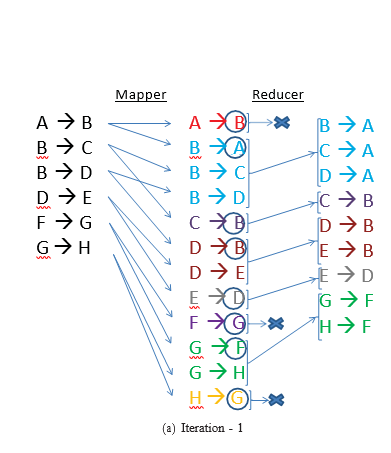
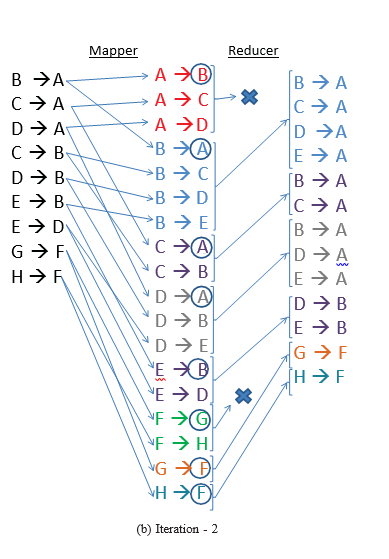
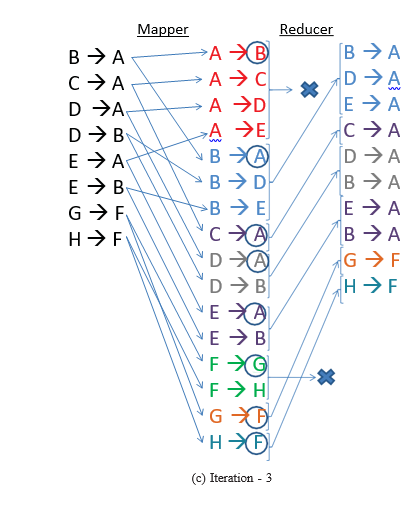
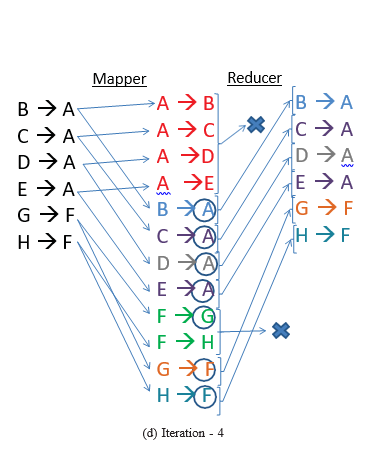

# VI.	EXPERIMENTS
In this section, we present the experimental results for our CCF approach. We ran the experiments on a hadoop cluster consisting of 80 nodes, each with 8 cores. There are 10 mappers, and 6 reducers available at each node. We also allocated 3 Gb memory for each map/reduce task.
We used two different real-world datasets for our ex- periments. The first one is a web graph (Web-google) which was released in 2002 by Google as a part of Google Programming Contest. This dataset can be found at http://snap.stanford.edu/data/web-Google.html. There are 875K nodes and 5.1M edges in this graph. Nodes represent web pages and directed edges represent hyperlinks between them. We used this dataset to compare the run-time perfor- mance of our approach with that of Pegasus [7] and CC- MR [2]. Table I presents the number of iterations and total run-time for the PEGASUS, CC-MR, and CCF methods. CC- MR took the least number of iterations, while PEGASUS took the most number of iterations. PEGASUS also took the longest amount of time to finish. Even though our CCF approach took 3 more iterations than the CC-MR approach, the run-time performance times are very close to each other. In the MapReduce framework, each map/reduce task has some initialization period. The run-time difference between CC-MR and CCF is mainly due to the initialization periods as CCF took 3 more iterations. In larger graphs with billions nodes and edges, the effect of initialization is negligible.
We also used a second dataset which has around 6 billion public people records and 92B pairwise similarity scores among these records to demonstrate the viability of our algorithm for very large data sets. We got several errors when trying to use Pegasus [7] and CC-MR [2] for this dataset. These approaches might be implemented with the assumption that each node id will be an integer. However, when there are 6B nodes in the graph, integer space is not enough to represent all of the nodes. Please note that this an assumption and the actual reason might be different. CCF found all of the connected components in this graph in 7 hours and 13 iterations. The diameter of this graph was 21. CCF found 435M connected components in this graph. The largest three connected components contain 53, 25, and 17 million nodes, respectively. The size distribution of all the connected components in this graph is given in Figure 6.
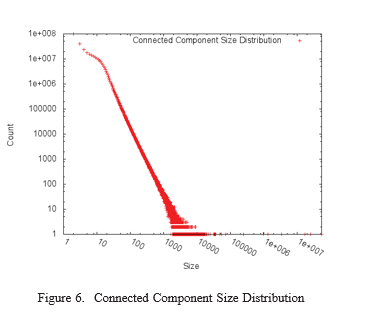
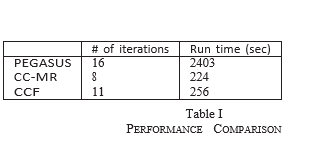
# VII.	CONCLUSION
requirements so that it may scale to the graphs with billions of nodes and edges. We used two different real-world datasets in our experiments. We first compared our approach with the PEGASUS and CC-MR methods on a web graph (Web- google). While our approach outperformed PEGASUS in terms of total run time, CC-MR approach performed slightly better than our approach. However, the main reason for that was the initialization overhead of map/reduce tasks. Next, we
demonstrated the viability of our approach on a massive graph with ∼6B nodes and ∼92B edges on an 80-node hadoop cluster. Due to their limitations, we were not able to run the other approaches with this graph. To the best of our knowledge, this is the largest graph publicly used in such an
experiment.


# REFERENCES
[1]	D. J. Cook and L. B. Holder, Mining Graph Data. John Wiley & Sons, 2006.
[2]	T. Seidl, B. Boden, and S. Fries, “Cc-mr finding connected components in huge graphs with mapreduce,” in Machine Learning and Knowledge Discovery in Databases, ser. Lecture Notes in Computer Science, P. Flach, T. Bie, and N. Cristianini, Eds. Springer Berlin Heidelberg, 2012, vol. 7523, pp. 458–473. [Online]. Available: http://dx.doi.org/10.1007/978-3-642-33460-3 35
 
[3]	A. Elmagarmid, P. Ipeirotis, and V. Verykios, “Duplicate record detec- tion: A survey,” Knowledge and Data Engineering, IEEE Transactions on, vol. 19, no. 1, pp. 1–16, 2007.
[4]	W. McNeill, H. Kardes, and A. Borthwick, “Dynamic record blocking: Efficient linking of massive databases in mapreduce,” 2012.
[5]	S. Chen, A. Borthwick, and V. Carvalho, “The case for cost-sensitive and easy-to-interpret models in industrial record linkage,” 2011.
[6]	J. Cohen, “Graph twiddling in a mapreduce world,” Computing in Science Engineering, vol. 11, no. 4, pp. 29–41, 2009.
[7]	U. Kang, C. Tsourakakis, and C. Faloutsos, “Pegasus: mining peta-scale graphs,” Knowledge and Information Systems, vol. 27, no. 2, pp. 303–325, 2011. [Online]. Available: http://dx.doi.org/10. 1007/s10115-010-0305-0
[8]	F. N. Afrati, V. Borkar, M. Carey, N. Polyzotis, and J. D. Ullman, “Map-reduce extensions and recursive queries,” in Proceedings of the 14th International Conference on Extending Database Technology, ser. EDBT/ICDT ’11. New York, NY, USA: ACM, 2011, pp. 1–8.
[9]	R. V., M. A., C. L., and D. S. A., “Finding connected components in map-reduce in logarithmic rounds,” in ICDE, 2013, pp. 50–61.
[10]	J. Lin and C. Dyer, Data-Intensive Text Processing with MapReduce, ser. Synthesis Lectures on Human Language Technologies. Morgan & Claypool Publishers, 2010.
[11]	“Amazon ec2 pricing,” http://aws.amazon.com/ec2/pricing/.
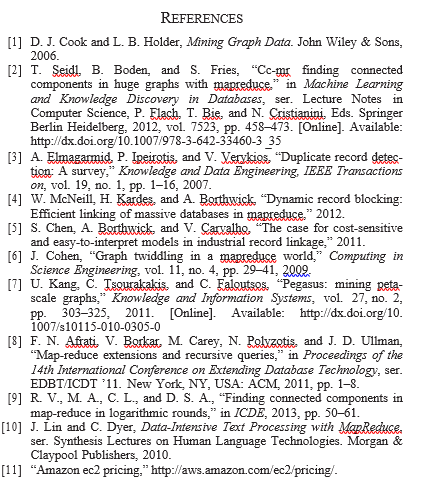